# Plot data basics, metadata
Number of subjects, age, trimester, sex, infer NA sex

### 1: Number of subjects

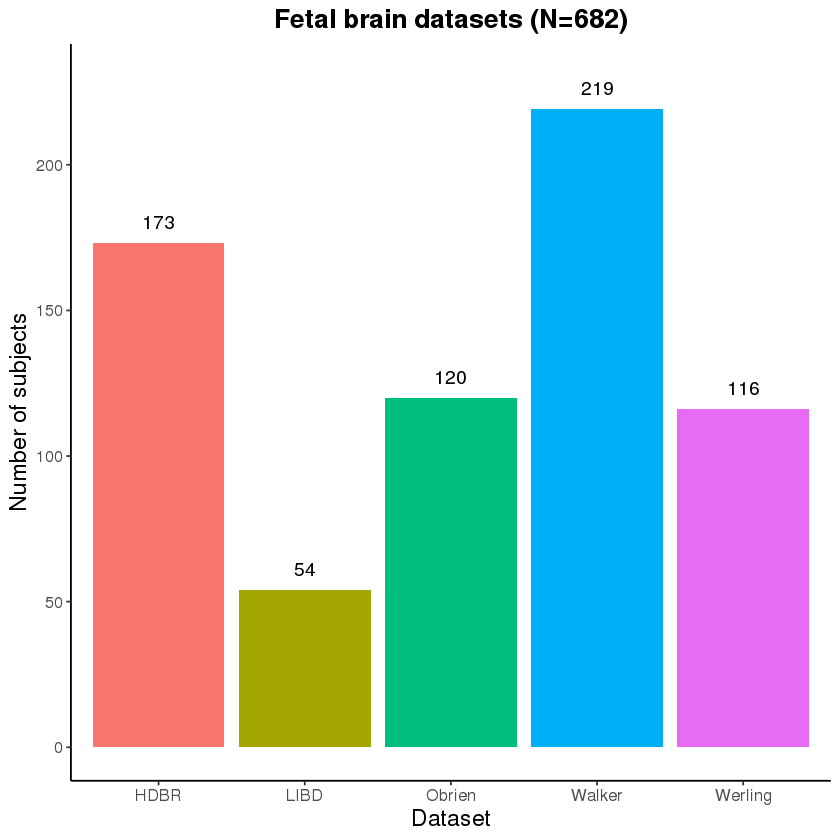

In [1]:
library(ggplot2)
df <- data.frame("data" = c("Walker", "Obrien", "Werling", "HDBR", "LIBD"),
                 "count" = c(219, 120, 116, 173, 54))
p1 <- ggplot(df, aes(x=data, y=count, fill=data)) +
  geom_bar(stat = "identity") +
  labs(x="Dataset", y="Number of subjects", title="Fetal brain datasets (N=682)") +
  geom_text(aes(label=count),vjust=-1, size=4) + 
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0, 230)
p1

In [2]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/subjects.png", p1, width = 6, height = 6)

### 2: Age

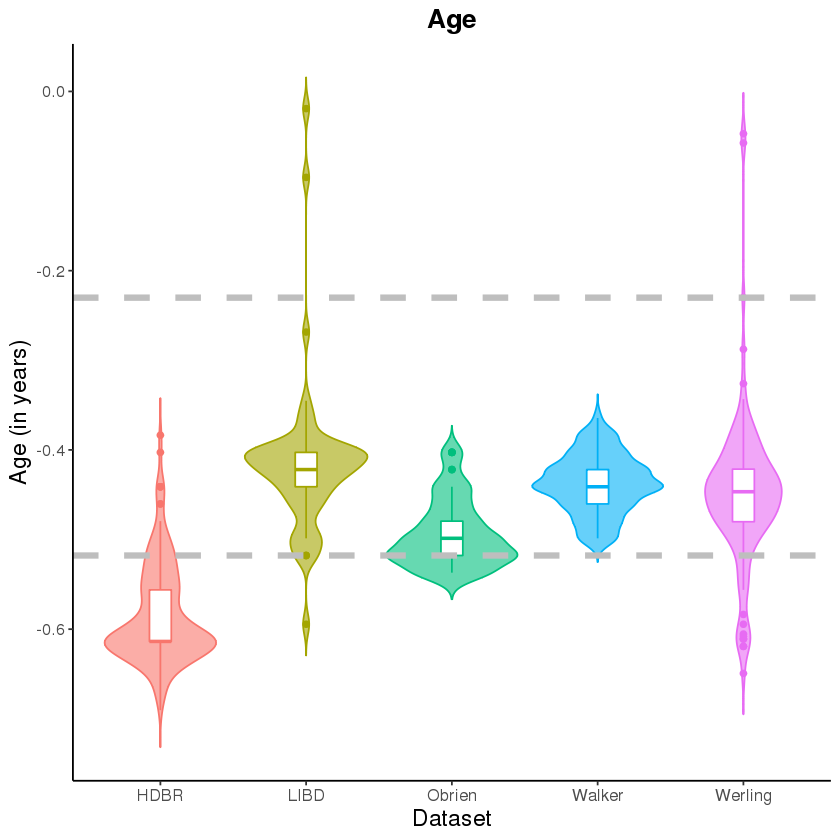

In [28]:
metadata_df <- read.table("~/project-gandalm/isoform_twas/eqtl_new/metadata_674_study.tsv", 
                          header = T, stringsAsFactors = F)
p2 <- ggplot(metadata_df, aes(x=Dataset, y=Age, fill=Dataset, color=Dataset)) +
  geom_violin(alpha=.6, trim = FALSE) +
  geom_boxplot(width = 0.15, fill='white') +
  labs(x="Dataset", y="Age (in years)", title="Age") + 
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        legend.position = "none") +
  geom_hline(yintercept = -0.5178082, linetype='dashed', col = 'grey', size = 1.8) +
  geom_hline(yintercept = -0.230137, linetype='dashed', col = 'grey', size = 1.8)
p2

In [4]:
for (i in c(13, 28)) {
    print((i-40)*7/365)
}

[1] -0.5178082
[1] -0.230137


In [29]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/age.png", p2, width = 6, height = 6)

### 3: Trimester

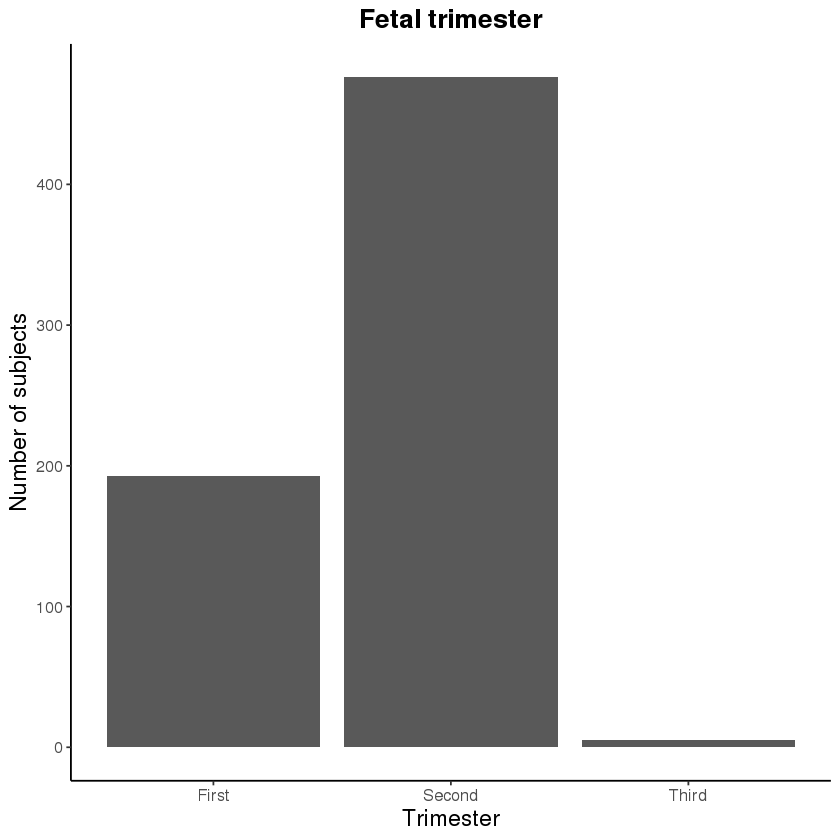

In [8]:
metadata_df$trimester <- NA
for (i in 1:nrow(metadata_df)){
  pcw <- metadata_df[i,"Age"]*365/7+40
  if (pcw < 13){
    metadata_df[i,"trimester"] <- 1
  }
  if (13 <= pcw & pcw < 28){
    metadata_df[i,"trimester"] <- 2
  }
  if (pcw >= 28){
    metadata_df[i,"trimester"] <- 3
  }
}
tri_df <- data.frame("Trimester" = c("First","Second","Third"),
                     "Count" = c(193, 476, 5))

p3 <- ggplot(tri_df, aes(x=Trimester, y=Count)) +
  geom_bar(stat = "identity") +
  labs(title = "Fetal trimester", x="Trimester", y="Number of subjects") +
  theme_classic() +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14), 
        plot.title = element_text(size=16, face="bold", hjust = 0.5)) 
p3

In [11]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/trimester.png", p3, width = 6, height = 6)

### 4: Sex

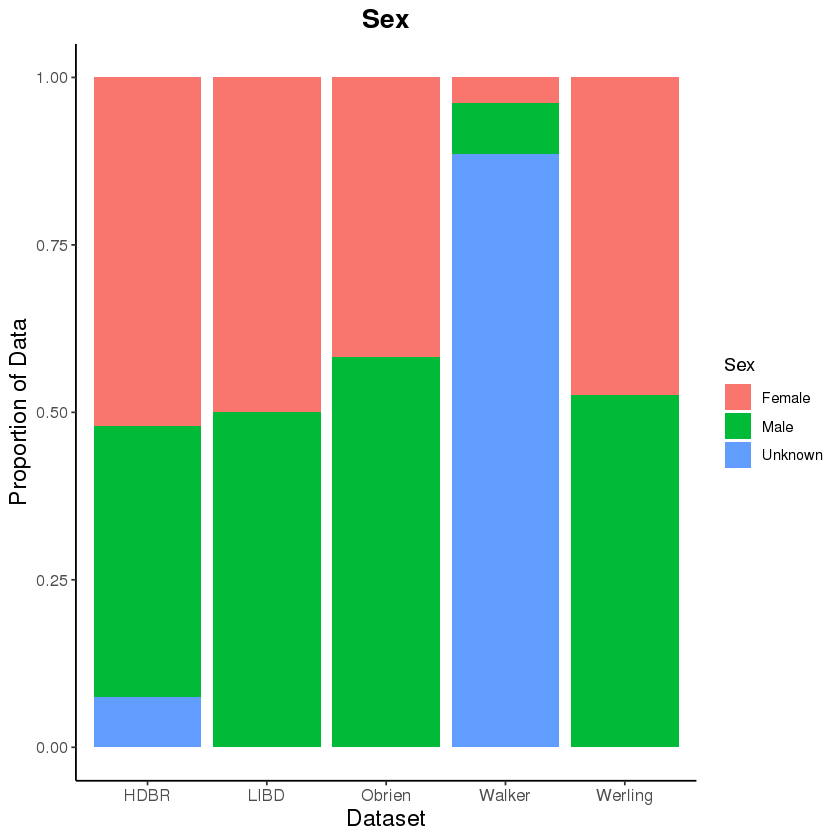

In [21]:
sex_df <- data.frame("data"=c(rep("Walker",3), rep("Obrien",3), rep("Werling",3), rep("HDBR",3), rep("LIBD",3)),
                     "sex" = rep(c("F","M","unknown"),5),
                     "count" = rep(NA, 15))

for (i in c("Walker", "Obrien", "Werling", "HDBR", "LIBD")) {
  sex_df[which(sex_df$data == i)[1],"count"] <- sum(metadata_df$Dataset == i & metadata_df$Sex =="F")
  sex_df[which(sex_df$data == i)[2],"count"] <- sum(metadata_df$Dataset == i & metadata_df$Sex =="M")
  sex_df[which(sex_df$data == i)[3],"count"] <- sum(metadata_df$Dataset == i & metadata_df$Sex =="unknown")
}

p4 <- ggplot(sex_df, aes(x=data, fill=sex, y=count)) +
  geom_bar(position = "fill", stat = "identity") +
  labs(title = "Sex", x="Dataset", y="Proportion of Data", fill = "Sex") +
  theme_classic() +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14), 
        plot.title = element_text(size=16, face="bold", hjust = 0.5)) +
  scale_fill_discrete(labels = c("Female", "Male", "Unknown"))
p4

In [22]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/sex.png", p4, width = 6, height = 6)

### 5: Infer sex (on 654 subjects with gene expression)
- XIST is female determining
- There are several genes on Y that are also on X (pseudo autosomal), should use PC1 of the non pseudo autosomal y genes (non PAR). Otherwise, no difference between sexes

In [1]:
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
gene_expr <- fread("~/project-gandalm/isoform_twas/salmon/expression.final/gene.TPM.tsv", data.table = F)
rownames(gene_expr) <- gene_expr$V1
gene_expr <- gene_expr[,-1]

Warning message in fread("~/project-gandalm/isoform_twas/salmon/expression.final/gene.TPM.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [35]:
head(gene_expr)

,1474,1496,1500,1502,1507,1511,1513,1525,1531,1533,⋯,1607,1707.1,1835,1851,1874,1890,1923,2193,849,898
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15_4,15.312388,9.736698,12.545874,9.610157,8.933554,11.863311,11.409191,9.288623,2.327234,11.710356,⋯,21.443322,30.952703,27.708777,22.524017,18.164824,32.571705,25.717615,49.647825,38.290939,23.588832
ENSG00000000005.6_3,0.026203,0.102362,0.000000,0.000000,0.120348,0.216065,0.000000,0.031251,0.028477,0.130274,⋯,0.639533,1.385840,0.021693,0.050902,6.849985,0.974701,0.424981,1.071157,3.319013,1.535562
ENSG00000000419.12_5,29.163281,17.855260,20.810088,14.846529,13.933431,22.106963,23.544696,18.260653,5.637668,20.300230,⋯,58.563947,48.776260,67.164843,53.503409,34.127237,50.609976,51.601622,51.486856,53.938523,35.070152
ENSG00000000457.14_6,6.117552,5.839119,5.915914,5.803059,5.562187,4.688638,6.183089,5.299584,1.352811,6.340578,⋯,3.681646,3.785211,4.846406,2.954069,2.494084,4.490378,4.731464,5.059666,6.415651,3.448370
ENSG00000000460.17_6,13.199738,6.375177,9.454004,6.073202,6.725299,7.948637,8.137369,5.145289,1.623995,7.962439,⋯,7.726783,4.298220,8.650468,4.518221,2.585521,8.391811,5.902101,6.018656,7.072445,3.399877
ENSG00000000938.13_5,0.095018,0.193908,0.149153,0.174478,0.320521,0.219874,0.147639,0.280529,0.036248,0.155331,⋯,1.996760,0.376429,0.254915,0.598106,1.001900,0.509333,0.635886,0.364718,1.196468,1.107435


In [3]:
gencode <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.tsv", data.table = F)

In [37]:
head(gencode)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972.5_2""; gene_type ""transcribed_unprocessed_pseudogene""; gene_name ""DDX11L1""; level 2; hgnc_id ""HGNC:37102""; havana_gene ""OTTHUMG00000000961.2_2""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
2,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5_3""; gene_type ""unprocessed_pseudogene""; gene_name ""WASH7P""; level 2; hgnc_id ""HGNC:38034""; havana_gene ""OTTHUMG00000000958.1_3""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
3,chr1,HAVANA,gene,29554,31109,.,+,.,"gene_id ""ENSG00000243485.5_6""; gene_type ""lncRNA""; gene_name ""MIR1302-2HG""; level 2; hgnc_id ""HGNC:52482""; tag ""ncRNA_host""; havana_gene ""OTTHUMG00000000959.2_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
4,chr1,HAVANA,gene,34554,36081,.,-,.,"gene_id ""ENSG00000237613.2_4""; gene_type ""lncRNA""; gene_name ""FAM138A""; level 2; hgnc_id ""HGNC:32334""; havana_gene ""OTTHUMG00000000960.1_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
5,chr1,HAVANA,gene,52473,53312,.,+,.,"gene_id ""ENSG00000268020.3_4""; gene_type ""unprocessed_pseudogene""; gene_name ""OR4G4P""; level 2; hgnc_id ""HGNC:14822""; havana_gene ""OTTHUMG00000185779.1_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
6,chr1,HAVANA,gene,57598,64116,.,+,.,"gene_id ""ENSG00000240361.2_3""; gene_type ""transcribed_unprocessed_pseudogene""; gene_name ""OR4G11P""; level 2; hgnc_id ""HGNC:31276""; havana_gene ""OTTHUMG00000001095.3_3""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"


** First extract chrY non PAR genes **

In [4]:
y_gene <- gencode %>% filter(V1=="chrY")

In [39]:
head(y_gene)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,chrY,HAVANA,gene,120410,121758,.,+,.,"gene_id ""ENSG00000228572.7_5_PAR_Y""; gene_type ""unprocessed_pseudogene""; gene_name ""AL954722.1""; level 2; tag ""PAR""; havana_gene ""OTTHUMG00000046372.2_5""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
2,chrY,HAVANA,gene,142989,170023,.,+,.,"gene_id ""ENSG00000182378.14_7_PAR_Y""; gene_type ""protein_coding""; gene_name ""PLCXD1""; level 2; hgnc_id ""HGNC:23148""; tag ""PAR""; havana_gene ""OTTHUMG00000022693.6_7""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
3,chrY,HAVANA,gene,171196,180884,.,-,.,"gene_id ""ENSG00000178605.13_3_PAR_Y""; gene_type ""protein_coding""; gene_name ""GTPBP6""; level 2; hgnc_id ""HGNC:30189""; tag ""PAR""; havana_gene ""OTTHUMG00000022694.3_3""; remap_status ""partial""; remap_num_mappings 1; remap_target_status ""overlap"";"
4,chrY,HAVANA,gene,231725,232586,.,+,.,"gene_id ""ENSG00000226179.6_6_PAR_Y""; gene_type ""lncRNA""; gene_name ""LINC00685""; level 2; hgnc_id ""HGNC:27560""; tag ""PAR""; havana_gene ""OTTHUMG00000021049.1_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
5,chrY,HAVANA,gene,244668,297690,.,-,.,"gene_id ""ENSG00000167393.18_7_PAR_Y""; gene_type ""protein_coding""; gene_name ""PPP2R3B""; level 2; hgnc_id ""HGNC:13417""; tag ""PAR""; havana_gene ""OTTHUMG00000021052.4_7""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
6,chrY,HAVANA,gene,297715,316314,.,+,.,"gene_id ""ENSG00000281849.3_7_PAR_Y""; gene_type ""lncRNA""; gene_name ""AL732314.8""; level 2; tag ""PAR""; havana_gene ""OTTHUMG00000189992.1_7""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""new"";"


In [5]:
dim(y_gene)

[1] 584   9

In [6]:
keep <- !grepl("PAR", y_gene[,"V9"])
y_gene_nonPAR <- y_gene[keep,]

In [42]:
head(y_gene_nonPAR)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
39,chrY,ENSEMBL,gene,2652790,2652894,.,+,.,"gene_id ""ENSG00000251841.1""; gene_type ""snRNA""; gene_status ""KNOWN""; gene_name ""RNU6-1334P""; level 3; remap_status ""automatic_small_ncrna_gene""; remap_substituted_missing_target ""V19"";"
40,chrY,HAVANA,gene,2654896,2655723,.,-,.,"gene_id ""ENSG00000184895.8_3""; gene_type ""protein_coding""; gene_name ""SRY""; level 2; hgnc_id ""HGNC:11311""; havana_gene ""OTTHUMG00000036084.2_3""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
41,chrY,HAVANA,gene,2657868,2658369,.,+,.,"gene_id ""ENSG00000237659.1_4""; gene_type ""processed_pseudogene""; gene_name ""RNASEH2CP1""; level 1; hgnc_id ""HGNC:24117""; tag ""pseudo_consens""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000036081.1_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
42,chrY,HAVANA,gene,2696023,2696259,.,+,.,"gene_id ""ENSG00000232195.1_4""; gene_type ""processed_pseudogene""; gene_name ""TOMM22P2""; level 1; hgnc_id ""HGNC:38737""; tag ""pseudo_consens""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000036083.2_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"
43,chrY,HAVANA,gene,2696233,2708892,.,-,.,"gene_id ""ENSG00000286130.1_3""; gene_type ""lncRNA""; gene_name ""AC006040.1""; level 2; havana_gene ""OTTHUMG00000193434.1_3""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""new"";"
44,chrY,HAVANA,gene,2709643,2800041,.,+,.,"gene_id ""ENSG00000129824.16_4""; gene_type ""protein_coding""; gene_name ""RPS4Y1""; level 2; hgnc_id ""HGNC:10425""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000036152.5_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";"


In [67]:
dim(y_gene_nonPAR)

[1] 534   9

In [7]:
y_gene_nonPAR_id <- c()
for (i in 1:nrow(y_gene_nonPAR)) {
  temp <- strsplit(y_gene_nonPAR[i,"V9"], split = " ")[[1]][2]
  y_gene_nonPAR_id[i] <- substr(temp, 2, nchar(temp)-2)
}

In [8]:
y_expr <- gene_expr[which(rownames(gene_expr) %in% y_gene_nonPAR_id),]
y_expr <- log2(.1 + y_expr)
y_expr_t <- as.data.frame(t(y_expr))

In [9]:
dim(y_expr)

[1] 483 654

**Now substract XIST**

In [10]:
xist_expr <- gene_expr["ENSG00000229807.12_6",]

In [11]:
xist_expr <- log2(.1+xist_expr)

** Now run PCA on chrY gene expression **

In [12]:
pca <- prcomp(y_expr_t[,which(apply(y_expr_t, 2, var)!=0)], scale. = TRUE)

In [13]:
# I have already inferred sex. Here just to make plots
meta <- read.table("~/project-gandalm/isoform_twas/eqtl_new/metadata_inferSex.tsv", header = T, stringsAsFactors = F)

In [14]:
head(meta)

,Subject,Age,Sex,inferSex
,<chr>,<dbl>,<chr>,<chr>
1,HSB100,-0.4027397,F,F
2,HSB152,-0.4602740,M,M
3,HSB195,-0.4219178,M,M
4,HSB221,-0.4027397,F,F
5,HSB222,-0.4823288,F,F
6,HSB238,-0.4794521,F,F


In [82]:
head(pca$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC387,PC388,PC389,PC390,PC391,PC392,PC393,PC394,PC395,PC396
1474,-2.0570184,-11.4993278,2.375124,7.196190,0.41762749,-0.1930968,0.1489064,-0.1606022,4.6560556,1.2367357,⋯,1.144917e-16,-3.148523e-16,-1.339207e-15,-1.309716e-16,-9.645063e-16,-5.251875e-16,-1.505740e-15,-7.598089e-16,1.752071e-16,-2.359224e-16
1496,1.0061838,0.2905965,1.341117,9.160063,-0.40470995,2.7439894,-1.2780750,0.6135864,2.6946692,2.1176244,⋯,1.068590e-15,1.388646e-15,5.447032e-16,2.576064e-16,-7.147061e-16,-5.663872e-16,8.326673e-17,1.271552e-15,-3.209238e-16,-3.313322e-16
1500,-1.0771311,-10.3823405,1.885137,6.379585,0.56265003,-0.7558734,0.1502183,0.0768868,1.0411057,-0.3307395,⋯,-4.336809e-16,1.192622e-15,5.100087e-16,-1.381707e-15,7.372575e-16,3.456003e-15,1.977585e-16,-7.650131e-16,-6.175616e-16,5.117434e-16
1502,-0.8418896,-11.0573784,1.611728,5.798429,-0.15603903,0.8677846,-0.2650938,-0.9091617,1.8633039,1.5712961,⋯,9.853229e-16,5.221518e-16,1.214306e-15,-1.196959e-16,-9.072604e-16,4.354156e-16,1.509209e-15,1.965442e-15,-4.232725e-16,-3.035766e-16
1507,-0.5562511,-8.5164272,1.307505,5.824403,-0.15418643,-0.6963802,0.1910471,-1.1867360,2.1017529,0.6140650,⋯,-3.261280e-16,6.921547e-16,6.314393e-16,-1.261144e-15,4.839878e-16,3.204902e-16,-6.279699e-16,-7.632783e-17,4.371503e-16,-3.217912e-16
1511,-0.7740982,-6.7040874,1.663017,3.647327,-0.05083642,-0.8367404,0.4866211,-0.3601016,0.1064712,-0.5150941,⋯,-6.383782e-16,-1.222980e-16,-6.938894e-17,-6.557255e-16,2.012279e-16,-5.737598e-16,4.753142e-16,4.544976e-16,-6.071532e-17,9.627715e-17


In [15]:
meta$xist <- NA
for (i in 1:nrow(meta)) {
  meta[i,"xist"] <- xist_expr[1, meta[i,"Subject"]]
}  

meta$ygenePC1 <- NA
for (i in 1:nrow(meta)) {
  meta[i, "ygenePC1"] <- pca$x[meta[i,"Subject"],1]
}

In [16]:
head(meta)

,Subject,Age,Sex,inferSex,xist,ygenePC1
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,HSB100,-0.4027397,F,F,6.592317,1.7809956
2,HSB152,-0.4602740,M,M,1.446716,-0.6727377
3,HSB195,-0.4219178,M,M,-2.074049,0.8555520
4,HSB221,-0.4027397,F,F,7.125516,1.4133382
5,HSB222,-0.4823288,F,F,7.158714,1.8246400
6,HSB238,-0.4794521,F,F,7.790590,1.7720798


Warning message:
“Removed 4 rows containing missing values (geom_point).”


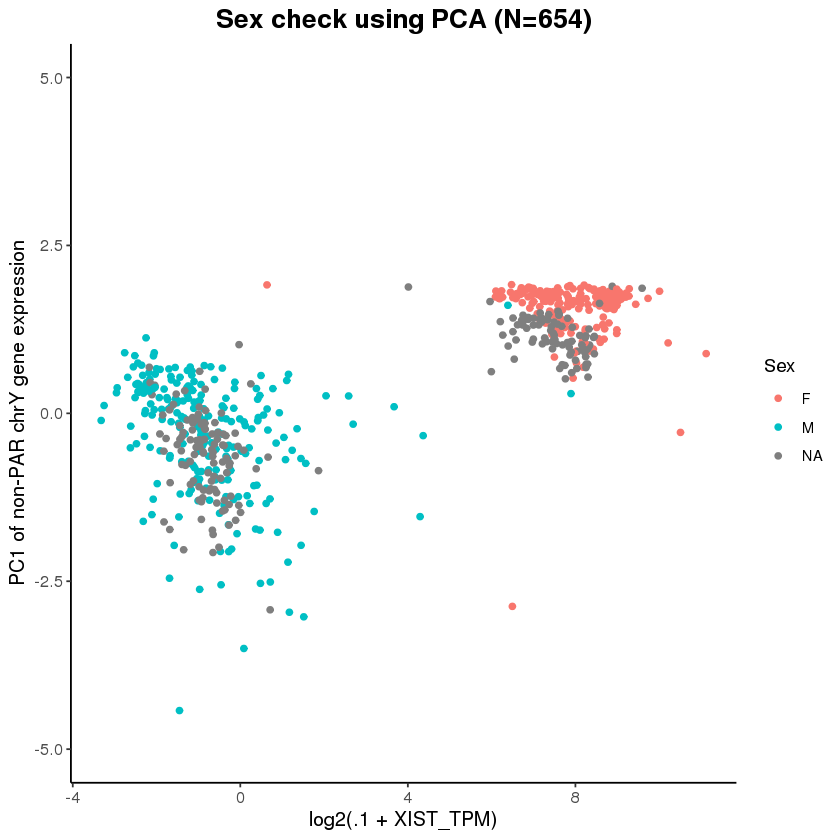

In [32]:
p5 <- ggplot(meta, aes(x=xist, y=ygenePC1, color=Sex)) +
  geom_point() +
  labs(x="log2(.1 + XIST_TPM)",
       y="PC1 of non-PAR chrY gene expression",
       title="Sex check using PCA (N=654)",
       color="Sex") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5)) +
  ylim(-5, 5)
p5

** Alternatively, MDS on chrY gene expression **

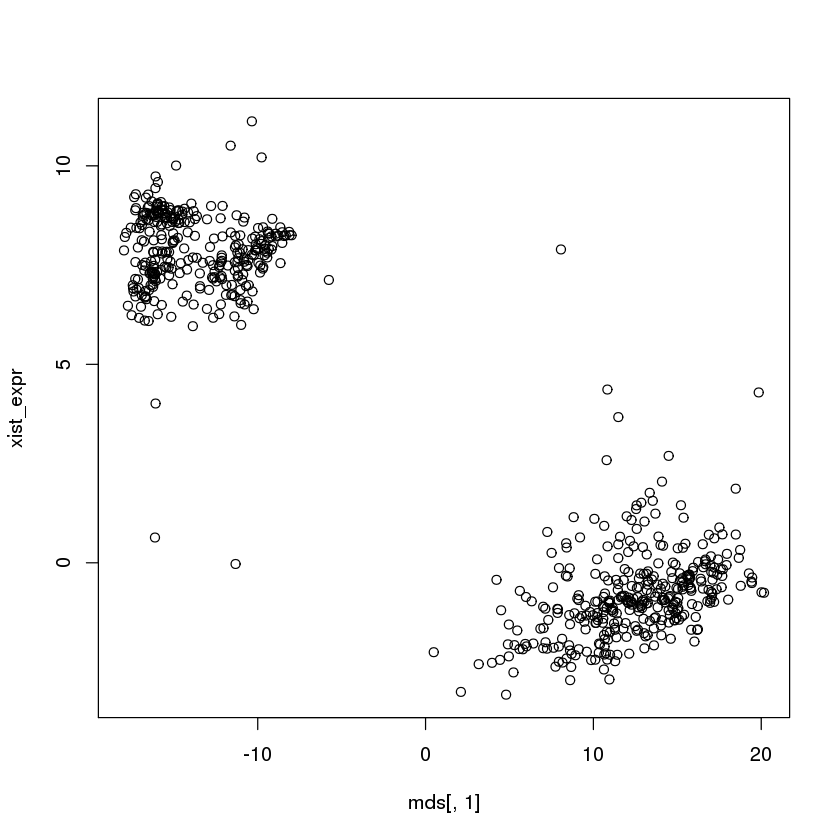

In [17]:
mds <- cmdscale(dist(y_expr_t))
plot(mds[,1], xist_expr)

In [18]:
meta$ygeneMDS1 <- NA
for (i in 1:nrow(meta)) {
  meta[i, "ygeneMDS1"] <- mds[meta[i,"Subject"],1]
}

In [19]:
head(meta)

,Subject,Age,Sex,inferSex,xist,ygenePC1,ygeneMDS1
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,HSB100,-0.4027397,F,F,6.592317,1.7809956,-16.169361
2,HSB152,-0.4602740,M,M,1.446716,-0.6727377,12.574748
3,HSB195,-0.4219178,M,M,-2.074049,0.8555520,5.295721
4,HSB221,-0.4027397,F,F,7.125516,1.4133382,-5.761925
5,HSB222,-0.4823288,F,F,7.158714,1.8246400,-16.251994
6,HSB238,-0.4794521,F,F,7.790590,1.7720798,-15.703711


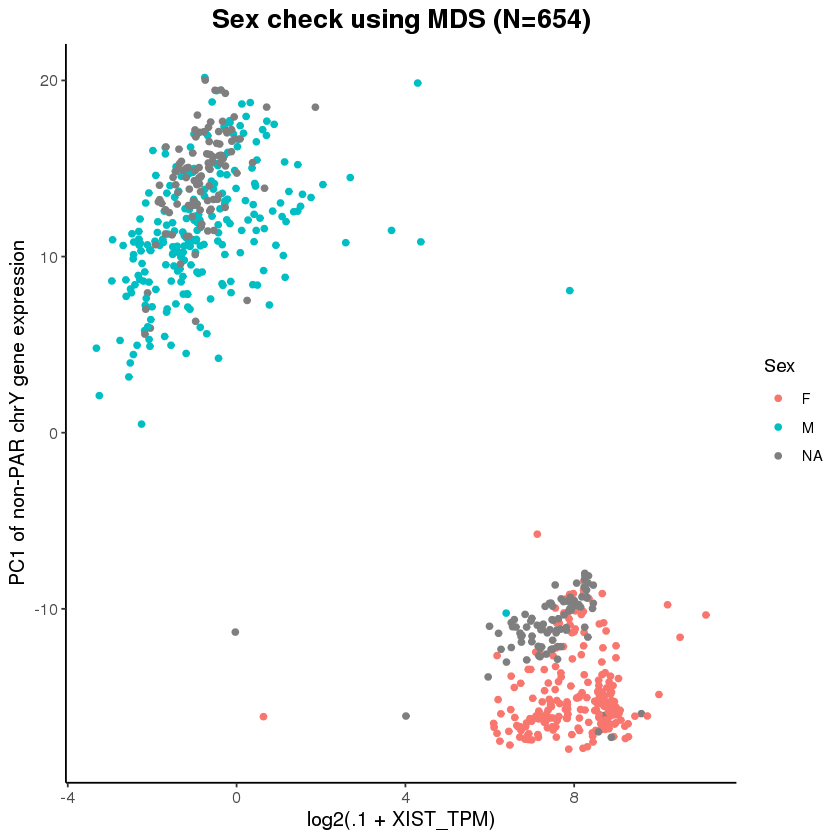

In [33]:
library(ggplot2)
p6 <- ggplot(meta, aes(x=xist, y=ygeneMDS1, color=Sex)) +
  geom_point() +
  labs(x="log2(.1 + XIST_TPM)",
       y="PC1 of non-PAR chrY gene expression",
       title="Sex check using MDS (N=654)",
       color="Sex") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5)) 
p6

In [34]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/sex_check.png", p6, width = 6, height = 6)

** Now, infer NA sex **

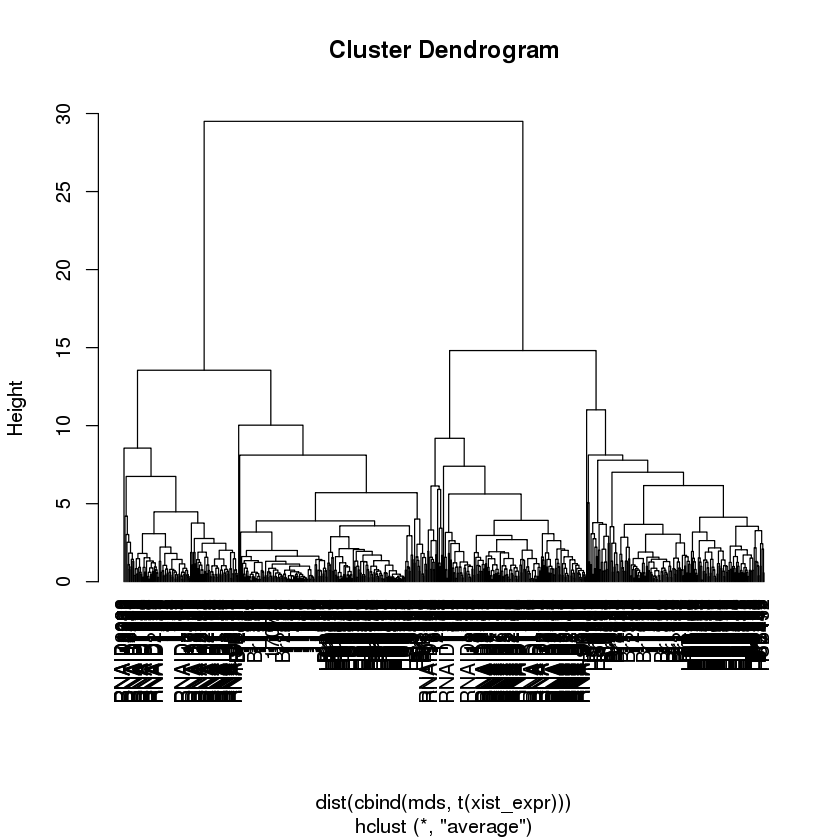

In [20]:
hc <- hclust(dist(cbind(mds, t(xist_expr))), method = "average")
plot(hc, hang = -1)

In [21]:
sub_group <- cutree(hc, k = 2)
table(sub_group)

sub_group
  1   2 
344 310 

In [32]:
# plot.new()
# rect.hclust(hc, k = 2, border = 2:3)

In [22]:
meta$inferSex2 <- NA
for(i in 1:nrow(meta)){
  if (sub_group[meta[i, "Subject"]] == 1) {
    meta[i, "inferSex2"] <- "M"
  }
  else if (sub_group[meta[i, "Subject"]] == 2) {
    meta[i, "inferSex2"] <- "F"
  }
  
}

In [23]:
head(meta)

,Subject,Age,Sex,inferSex,xist,ygenePC1,ygeneMDS1,inferSex2
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,HSB100,-0.4027397,F,F,6.592317,1.7809956,-16.169361,F
2,HSB152,-0.4602740,M,M,1.446716,-0.6727377,12.574748,M
3,HSB195,-0.4219178,M,M,-2.074049,0.8555520,5.295721,M
4,HSB221,-0.4027397,F,F,7.125516,1.4133382,-5.761925,F
5,HSB222,-0.4823288,F,F,7.158714,1.8246400,-16.251994,F
6,HSB238,-0.4794521,F,F,7.790590,1.7720798,-15.703711,F


In [24]:
# Check: am I getting the same results as before?
sum(meta$inferSex != meta$inferSex2)

[1] 0

In [25]:
# 2 subjects have inconsistent sex
# according to figure, use inferred sex
count <- 0
for (i in 1:nrow(meta)) {
  if(! is.na(meta[i, "Sex"])) {
    if(meta[i, "Sex"] != meta[i, "inferSex"]) {
      count <- count +1
    }
  }
}
count

# write.table(meta, "metadata_inferSex.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 2

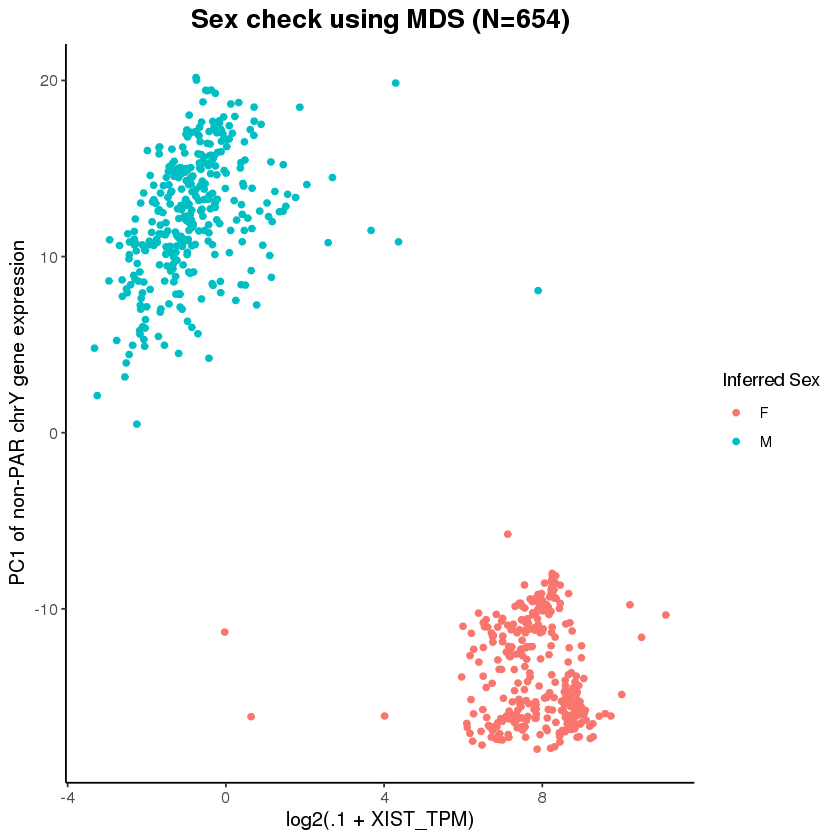

In [35]:
library(ggplot2)
p7 <- ggplot(meta, aes(x=xist, y=ygeneMDS1, color=inferSex2)) +
  geom_point() +
  labs(x="log2(.1 + XIST_TPM)",
       y="PC1 of non-PAR chrY gene expression",
       title="Sex check using MDS (N=654)",
       color="Inferred Sex") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5)) 
p7

In [37]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/sex_check_inferred.png", p7, width = 6, height = 6)

In [38]:
meta$data <- NA
walker <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
libd <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")
hdbr <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")

In [45]:
for(i in 1:nrow(meta)) {
  if(meta[i, "Subject"] %in% walker[,1]) {
    meta[i, "data"] <- "Walker"
  }
  if(meta[i, "Subject"] %in% obrien[,1]) {
    meta[i, "data"] <- "Obrien"
  }
  if(meta[i, "Subject"] %in% werling[,1]) {
    meta[i, "data"] <- "Werling"
  }
  if(meta[i, "Subject"] %in% hdbr[,1]) {
    meta[i, "data"] <- "HDBR"
  }
  if(meta[i, "Subject"] %in% libd[,1]) {
    meta[i, "data"] <- "LIBD"
  }
}

In [46]:
sex_df <- data.frame("data"=c(rep("Walker",2), rep("Obrien",2), rep("Werling",2), rep("HDBR",2), rep("LIBD",2)),
                     "sex" = rep(c("F","M"),5),
                     "count" = rep(NA, 10))
for (i in c("Walker", "Obrien", "Werling", "HDBR", "LIBD")) {
  sex_df[which(sex_df$data == i)[1],"count"] <- sum(meta$data == i & meta$inferSex =="F")
  sex_df[which(sex_df$data == i)[2],"count"] <- sum(meta$data == i & meta$inferSex =="M")
}

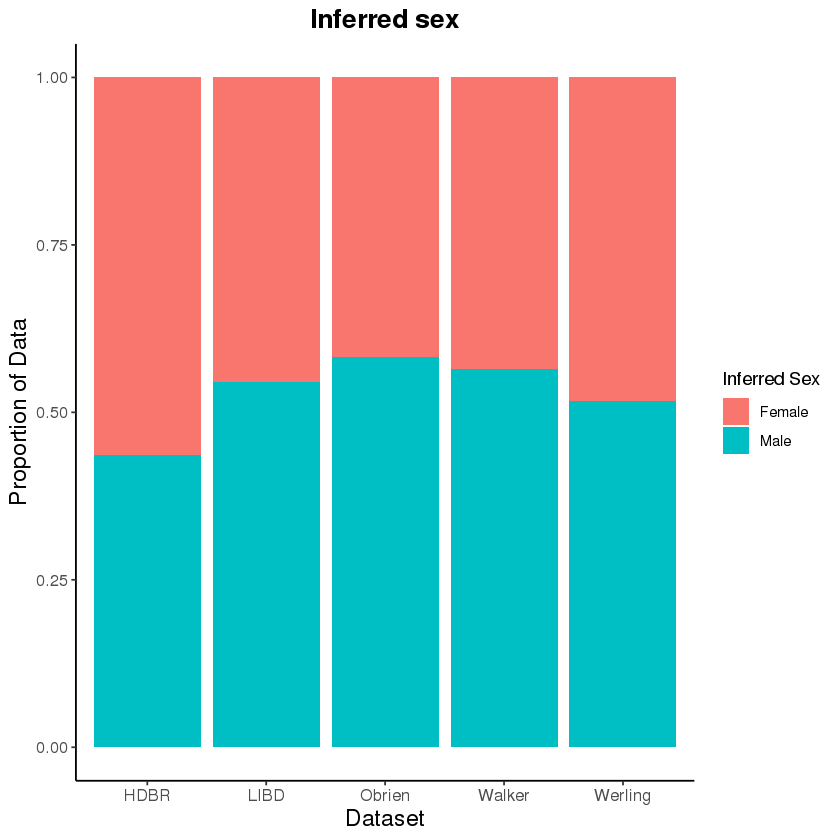

In [48]:
p8 <- ggplot(sex_df, aes(x=data, fill=sex, y=count)) +
  geom_bar(position = "fill", stat = "identity") +
  labs(title = "Inferred sex", x="Dataset", y="Proportion of Data",
       fill = "Inferred Sex") +
  theme_classic() +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14), 
        plot.title = element_text(size=16, face="bold", hjust = 0.5)) +
  scale_fill_discrete(labels = c("Female", "Male"))
p8

In [49]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/sex_inferred.png", height = 6, width = 6)